# Myanmar Coup fatality Dataset

source: [aappb](https://aappb.org/?cat=109)

In [1]:
import camelot
import numpy as np
import matplotlib.pyplot as plt

## Load data from pdf file

In [2]:
tables = camelot.read_pdf("Recent-Fatality-List-for-July-20-2021-Englishfinal.pdf", pages='1-end')
tables.n

65

In [48]:
dataset = tables[0].df

for tableIndex in range(1, tables.n):
    dataset = dataset.append(tables[tableIndex].df, ignore_index=True)

dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,No.,Name,Sex,Age,Father's name,Date of \nIncident,Deceased \nDate,Organization,Place of Incidents,Home Adress,Township,States/Regions Remarks,
1,1,Na Pwar (aka) Ko Nyi \nNyi Oo,M,32,U Hla Ngwe,08-Feb-21,08-Feb-21,Civilian,Mandalay,"75 Street, \nbetween 37 and \n38 Street",Mahaaungmye,Mandalay Region,"In another incident, 32 year old Ko \nNa Pwar ..."
2,2,Mya Thwate Thwate \nKhaing,F,19,U Min Lwin,09-Feb-21,19-Feb-21,Student,NayPyi Taw,"Hlaykhwintaung, \nLower \nPaunglaung \nHydro P...",Zeyathiri,Naypyidaw,"On February 9, peaceful anti-coup \nprotests i..."
3,3,Nay Nay Win Htet,M,18,unknown,15-Feb-21,15-Feb-21,Civilian,"Myeik, Tanintharyi \nRegion",Toe Chal Ward,Myeik,Tanintharyi \nRegion,"On 15 February evening, 18-year old \nMaung Na..."
4,4,Thet Naing Win @ Min \nMin,M,37,U Maung San,20-Feb-21,20-Feb-21,Civilian,"Kannar Road, \nMandalay City",Near 41 Street,Mahaaungmye,Mandalay Region,"In Mandalay, a shipyaroad raid \nturned violen..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
889,,,,,,,,,,,,,
890,,,,,,,,,,,,,
891,,,,,,,,,,,,,
892,,,,,,,,,,,,,


## Cleanup data
Cleanup row without number

In [49]:
dataset = dataset[dataset[0].str.len() > 0]
dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,No.,Name,Sex,Age,Father's name,Date of \nIncident,Deceased \nDate,Organization,Place of Incidents,Home Adress,Township,States/Regions Remarks,
1,1,Na Pwar (aka) Ko Nyi \nNyi Oo,M,32,U Hla Ngwe,08-Feb-21,08-Feb-21,Civilian,Mandalay,"75 Street, \nbetween 37 and \n38 Street",Mahaaungmye,Mandalay Region,"In another incident, 32 year old Ko \nNa Pwar ..."
2,2,Mya Thwate Thwate \nKhaing,F,19,U Min Lwin,09-Feb-21,19-Feb-21,Student,NayPyi Taw,"Hlaykhwintaung, \nLower \nPaunglaung \nHydro P...",Zeyathiri,Naypyidaw,"On February 9, peaceful anti-coup \nprotests i..."
3,3,Nay Nay Win Htet,M,18,unknown,15-Feb-21,15-Feb-21,Civilian,"Myeik, Tanintharyi \nRegion",Toe Chal Ward,Myeik,Tanintharyi \nRegion,"On 15 February evening, 18-year old \nMaung Na..."
4,4,Thet Naing Win @ Min \nMin,M,37,U Maung San,20-Feb-21,20-Feb-21,Civilian,"Kannar Road, \nMandalay City",Near 41 Street,Mahaaungmye,Mandalay Region,"In Mandalay, a shipyaroad raid \nturned violen..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,865,Thet Soe,M,40,U Myint,17-Jul-21,17-Jul-21,Civilian,Sakekhun Village,Seik Khun Village,Shwebo,Sagaing Region,"On the night of July 17, junta troops \nraided..."
866,866,Aung Paing Htwe,M,35,U Mya Khin,17-Jul-21,17-Jul-21,Civilian,Sakekhun Village,Seik Khun Village,Shwebo,Sagaing Region,"On the night of July 17, junta troops \nraided..."
867,867,Aye Hla,M,72,U Phoe Con,16-Jun-21,19-Jul-21,NLD,Kyike Sakaw prison,"5 ward, Phado \ntown",Kyaukdaga,Bago Region,"Aye Hla, Vice Chairman of NLD of \nKyaukdaga T..."
868,868,Nyan Win,M,79,Unknown Name,01-Feb-21,20-Jul-21,"NLD, Personal \nAttorney of \nDaw Aung San \nS...",Yangon General \nHospital,,Sanchaung,Yangon Region,"Nyan Win, NLD Secretary, who \ncontracted COVI..."


 Cleanup newline (\n)

In [50]:
dataset = dataset.applymap(lambda str: str.replace('\n', ''))
dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,No.,Name,Sex,Age,Father's name,Date of Incident,Deceased Date,Organization,Place of Incidents,Home Adress,Township,States/Regions Remarks,
1,1,Na Pwar (aka) Ko Nyi Nyi Oo,M,32,U Hla Ngwe,08-Feb-21,08-Feb-21,Civilian,Mandalay,"75 Street, between 37 and 38 Street",Mahaaungmye,Mandalay Region,"In another incident, 32 year old Ko Na Pwar (a..."
2,2,Mya Thwate Thwate Khaing,F,19,U Min Lwin,09-Feb-21,19-Feb-21,Student,NayPyi Taw,"Hlaykhwintaung, Lower Paunglaung Hydro Power P...",Zeyathiri,Naypyidaw,"On February 9, peaceful anti-coup protests in ..."
3,3,Nay Nay Win Htet,M,18,unknown,15-Feb-21,15-Feb-21,Civilian,"Myeik, Tanintharyi Region",Toe Chal Ward,Myeik,Tanintharyi Region,"On 15 February evening, 18-year old Maung Nay ..."
4,4,Thet Naing Win @ Min Min,M,37,U Maung San,20-Feb-21,20-Feb-21,Civilian,"Kannar Road, Mandalay City",Near 41 Street,Mahaaungmye,Mandalay Region,"In Mandalay, a shipyaroad raid turned violent ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,865,Thet Soe,M,40,U Myint,17-Jul-21,17-Jul-21,Civilian,Sakekhun Village,Seik Khun Village,Shwebo,Sagaing Region,"On the night of July 17, junta troops raided S..."
866,866,Aung Paing Htwe,M,35,U Mya Khin,17-Jul-21,17-Jul-21,Civilian,Sakekhun Village,Seik Khun Village,Shwebo,Sagaing Region,"On the night of July 17, junta troops raided S..."
867,867,Aye Hla,M,72,U Phoe Con,16-Jun-21,19-Jul-21,NLD,Kyike Sakaw prison,"5 ward, Phado town",Kyaukdaga,Bago Region,"Aye Hla, Vice Chairman of NLD of Kyaukdaga Tow..."
868,868,Nyan Win,M,79,Unknown Name,01-Feb-21,20-Jul-21,"NLD, Personal Attorney of Daw Aung San Suu Kyi...",Yangon General Hospital,,Sanchaung,Yangon Region,"Nyan Win, NLD Secretary, who contracted COVID-..."


Fix column names

In [51]:
header = dataset.head(1).to_numpy()[0]
header

array(['No.', 'Name', 'Sex', 'Age', "Father's name", 'Date of Incident',
       'Deceased Date', 'Organization', 'Place of Incidents',
       'Home Adress', 'Township', 'States/Regions Remarks', ''],
      dtype=object)

In [52]:
header[-4] = 'Home Address'
header[-2] = 'States/Regions'
header[-1] = 'Remarks'
header

array(['No.', 'Name', 'Sex', 'Age', "Father's name", 'Date of Incident',
       'Deceased Date', 'Organization', 'Place of Incidents',
       'Home Address', 'Township', 'States/Regions', 'Remarks'],
      dtype=object)

In [53]:
dataset.columns = header
dataset = dataset.drop(index=0)
dataset

,No.,Name,Sex,Age,Father's name,Date of Incident,Deceased Date,Organization,Place of Incidents,Home Address,Township,States/Regions,Remarks
1,1,Na Pwar (aka) Ko Nyi Nyi Oo,M,32,U Hla Ngwe,08-Feb-21,08-Feb-21,Civilian,Mandalay,"75 Street, between 37 and 38 Street",Mahaaungmye,Mandalay Region,"In another incident, 32 year old Ko Na Pwar (a..."
2,2,Mya Thwate Thwate Khaing,F,19,U Min Lwin,09-Feb-21,19-Feb-21,Student,NayPyi Taw,"Hlaykhwintaung, Lower Paunglaung Hydro Power P...",Zeyathiri,Naypyidaw,"On February 9, peaceful anti-coup protests in ..."
3,3,Nay Nay Win Htet,M,18,unknown,15-Feb-21,15-Feb-21,Civilian,"Myeik, Tanintharyi Region",Toe Chal Ward,Myeik,Tanintharyi Region,"On 15 February evening, 18-year old Maung Nay ..."
4,4,Thet Naing Win @ Min Min,M,37,U Maung San,20-Feb-21,20-Feb-21,Civilian,"Kannar Road, Mandalay City",Near 41 Street,Mahaaungmye,Mandalay Region,"In Mandalay, a shipyaroad raid turned violent ..."
5,5,Wai Yan Tun,M,16,unknown,20-Feb-21,20-Feb-21,Civilian,"Kannar Road, Mandalay City",Near 41 Street,Mahaaungmye,Mandalay Region,"In Mandalay, a shipyaroad raid turned violent ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,865,Thet Soe,M,40,U Myint,17-Jul-21,17-Jul-21,Civilian,Sakekhun Village,Seik Khun Village,Shwebo,Sagaing Region,"On the night of July 17, junta troops raided S..."
866,866,Aung Paing Htwe,M,35,U Mya Khin,17-Jul-21,17-Jul-21,Civilian,Sakekhun Village,Seik Khun Village,Shwebo,Sagaing Region,"On the night of July 17, junta troops raided S..."
867,867,Aye Hla,M,72,U Phoe Con,16-Jun-21,19-Jul-21,NLD,Kyike Sakaw prison,"5 ward, Phado town",Kyaukdaga,Bago Region,"Aye Hla, Vice Chairman of NLD of Kyaukdaga Tow..."
868,868,Nyan Win,M,79,Unknown Name,01-Feb-21,20-Jul-21,"NLD, Personal Attorney of Daw Aung San Suu Kyi...",Yangon General Hospital,,Sanchaung,Yangon Region,"Nyan Win, NLD Secretary, who contracted COVID-..."


Expand combined row

In [54]:
def extract_number_from_string(str):
    numbers = [int(s) for s in str.split() if s.isdigit()]

    if len(numbers) > 0:
        return numbers[0]
    return ''

combined_row = dataset['Name'].map(extract_number_from_string)

for rowIndex in combined_row[combined_row != ''].index: 
    for i in range(combined_row[rowIndex] - 1):
        dataset = dataset.append(dataset.iloc[rowIndex])

dataset


,No.,Name,Sex,Age,Father's name,Date of Incident,Deceased Date,Organization,Place of Incidents,Home Address,Township,States/Regions,Remarks
1,1,Na Pwar (aka) Ko Nyi Nyi Oo,M,32,U Hla Ngwe,08-Feb-21,08-Feb-21,Civilian,Mandalay,"75 Street, between 37 and 38 Street",Mahaaungmye,Mandalay Region,"In another incident, 32 year old Ko Na Pwar (a..."
2,2,Mya Thwate Thwate Khaing,F,19,U Min Lwin,09-Feb-21,19-Feb-21,Student,NayPyi Taw,"Hlaykhwintaung, Lower Paunglaung Hydro Power P...",Zeyathiri,Naypyidaw,"On February 9, peaceful anti-coup protests in ..."
3,3,Nay Nay Win Htet,M,18,unknown,15-Feb-21,15-Feb-21,Civilian,"Myeik, Tanintharyi Region",Toe Chal Ward,Myeik,Tanintharyi Region,"On 15 February evening, 18-year old Maung Nay ..."
4,4,Thet Naing Win @ Min Min,M,37,U Maung San,20-Feb-21,20-Feb-21,Civilian,"Kannar Road, Mandalay City",Near 41 Street,Mahaaungmye,Mandalay Region,"In Mandalay, a shipyaroad raid turned violent ..."
5,5,Wai Yan Tun,M,16,unknown,20-Feb-21,20-Feb-21,Civilian,"Kannar Road, Mandalay City",Near 41 Street,Mahaaungmye,Mandalay Region,"In Mandalay, a shipyaroad raid turned violent ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,656,Kaung Kyaw Tun,M,19,Unknown Name,09-Apr-21,09-Apr-21,Student,Maggatic Road,,Bago,Bago Region,"Earlier on April 9, before dawn, the terrorist..."
656,656,Kaung Kyaw Tun,M,19,Unknown Name,09-Apr-21,09-Apr-21,Student,Maggatic Road,,Bago,Bago Region,"Earlier on April 9, before dawn, the terrorist..."
656,656,Kaung Kyaw Tun,M,19,Unknown Name,09-Apr-21,09-Apr-21,Student,Maggatic Road,,Bago,Bago Region,"Earlier on April 9, before dawn, the terrorist..."
656,656,Kaung Kyaw Tun,M,19,Unknown Name,09-Apr-21,09-Apr-21,Student,Maggatic Road,,Bago,Bago Region,"Earlier on April 9, before dawn, the terrorist..."


Drop unused columns

In [55]:
dataset = dataset.drop(columns=['No.','Name',"Father's name", 'Home Address', 'Deceased Date', 'Place of Incidents', 'Township', 'States/Regions', 'Remarks'])
dataset

,Sex,Age,Date of Incident,Organization
1,M,32,08-Feb-21,Civilian
2,F,19,09-Feb-21,Student
3,M,18,15-Feb-21,Civilian
4,M,37,20-Feb-21,Civilian
5,M,16,20-Feb-21,Civilian
...,...,...,...,...
656,M,19,09-Apr-21,Student
656,M,19,09-Apr-21,Student
656,M,19,09-Apr-21,Student
656,M,19,09-Apr-21,Student


## Explore data

In [56]:
dataset.describe()

,Sex,Age,Date of Incident,Organization
count,922,922,922,922
unique,4,67,120,75
top,M,,27-Mar-21,Civilian
freq,822,194,164,704


In [57]:
dataset['Sex'].value_counts()

M       822
F        60
         39
LGBT      1
Name: Sex, dtype: int64

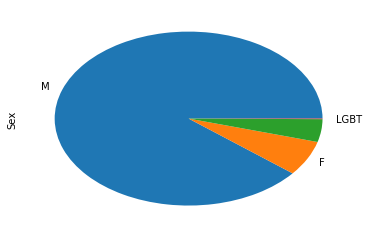

In [58]:
dataset['Sex'].value_counts().plot(kind='pie')


In [59]:
dataset['Age'].value_counts()

      194
19     98
20     39
30     33
40     29
     ... 
9       1
57      1
6       1
90      1
54      1
Name: Age, Length: 67, dtype: int64

In [60]:
def parse_age(str):
  if str.find(' ') > 0:
    return str.split()[0]
  
  return str

dataset['Age'] = dataset['Age'].apply(parse_age)

(array([  3., 175., 231., 165.,  97.,  37.,  13.,   5.,   1.,   1.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

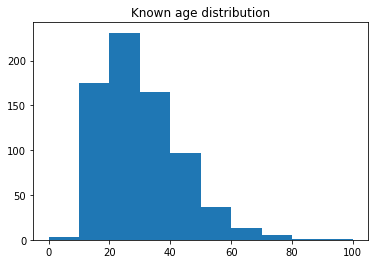

In [61]:
ages = dataset['Age'].to_numpy()

fig, ax = plt.subplots()
ax.set_title('Known age distribution')
ax.hist(ages[ages != ''].astype(np.int), range=[0, 100])

In [62]:
dataset['Organization'].value_counts()

Civilian                                     704
Student                                      108
                                              17
Teacher                                        7
Engineer                                       3
                                            ... 
Farmer                                         1
Child                                          1
Yin Mar Pin Forest Department Forest Head      1
Tourist Guide                                  1
Former Navy                                    1
Name: Organization, Length: 75, dtype: int64

In [63]:
def conbine_organization(org):
    lower_org = org.lower()
    if 'student' in lower_org or 'b.a' in lower_org:
        return 'Student'
    elif 'doctor' in lower_org or 'nurse' in lower_org:
        return 'Doctor/Nurse'
    elif 'nld' in lower_org:
        return 'NLD'
    elif 'engineer' in lower_org:
        return 'Engineer'
    elif 'teacher' in lower_org:
        return 'Teacher'
    elif 'bank staff' in lower_org or 'kbz' in lower_org:
        return 'Bank Staff'
    elif 'servant' in lower_org or 'department' in lower_org:
        return 'Civil Servant'
    elif 'civilian' in lower_org:
        return 'Civilian'
    elif 'activist' in lower_org:
        return 'Activist'
    else:
        return org

grouped_organizations = dataset['Organization'].apply(conbine_organization)
grouped_organizations.value_counts()

Civilian                                  706
Student                                   127
                                           17
NLD                                        10
Teacher                                     9
Engineer                                    5
Doctor/Nurse                                5
Civil Servant                               4
Bank Staff                                  4
Poet                                        3
Activist                                    3
Worker Association                          2
Volunteer                                   2
Futsal Goalkeeper                           1
Worker                                      1
Traffic Police (CDM)                        1
King & Queen Hotel Staff                    1
Former Hundred Household Administrator      1
CDM Police                                  1
Carpenter                                   1
Model, Actor                                1
Former Police                     

In [64]:
grouped_organizations_counts = grouped_organizations.value_counts()

def cut_other_organizations(org):
    if grouped_organizations_counts[org] < 4:
        return 'Other'
    return org

grouped_organizations = grouped_organizations.apply(cut_other_organizations)
grouped_organizations.value_counts()

Civilian         706
Student          127
Other             35
                  17
NLD               10
Teacher            9
Doctor/Nurse       5
Engineer           5
Civil Servant      4
Bank Staff         4
Name: Organization, dtype: int64

In [65]:
dataset['Organization'] = grouped_organizations
dataset

,Sex,Age,Date of Incident,Organization
1,M,32,08-Feb-21,Civilian
2,F,19,09-Feb-21,Student
3,M,18,15-Feb-21,Civilian
4,M,37,20-Feb-21,Civilian
5,M,16,20-Feb-21,Civilian
...,...,...,...,...
656,M,19,09-Apr-21,Student
656,M,19,09-Apr-21,Student
656,M,19,09-Apr-21,Student
656,M,19,09-Apr-21,Student


## Export JSON

In [66]:
dataset.columns = ['sex', 'age', 'dateOfIncident', 'organization']
dataset

,sex,age,dateOfIncident,organization
1,M,32,08-Feb-21,Civilian
2,F,19,09-Feb-21,Student
3,M,18,15-Feb-21,Civilian
4,M,37,20-Feb-21,Civilian
5,M,16,20-Feb-21,Civilian
...,...,...,...,...
656,M,19,09-Apr-21,Student
656,M,19,09-Apr-21,Student
656,M,19,09-Apr-21,Student
656,M,19,09-Apr-21,Student


In [67]:
dataset.to_csv('recent-fatality.csv', index=False)